# KNN Algoritması

## 1. Adım : Veri Seti İncelemesi

Verilerin Yüklenmesi

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
cancer_df = pd.DataFrame( data = cancer.data , columns = cancer.feature_names ) #Yüklenen datayı DataFrame hale getirdik. Data parametresi verileri , Feature_names parametresi ise sütun başlıklarını belirtir.
cancer_df["Target"] = cancer.target #Buradaki target sütunu ise kanserin iyi huylumu (0) kötü huylumu (1) olduğunu belirten verileri tabloya ekler.
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 2. Adım : Makine Öğrenmesi Modelinin Seçilmesi = KNN Sınıflandırıcı

Bu veriler için en uygun model KNN Sınıflandırı olduğu için onu seçtik.

## 3. Adım : Modelin Train Edilmesi

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
X = cancer.data #Fit fonksiyonun istediği 2 parametreden biri olan veriler.
y = cancer.target #Fit fonksiyonun istediği 2 parametreden biri olan target.

knn.fit( X , y) #Fit fonksiyonu verimizi ( sample + target ) kullanarak KNN algoritmasını eğitir.

KNeighborsClassifier()

## 4. Adım : Sonuçların Değerlendirilmesi ( Test Aşaması )

In [4]:
y_predict = knn.predict(X)  #Eğitilmiş KNN değişkenine atanmış modeli predict fonksiyonu ile tahmin yapılması sağlanabilir.
#Predict fonksiyonu X parametresi yani sample verilerini parametre olarak ister ve karşılık olarak tahmin yaptığı target verilerini döndürür.

In [5]:
print(y_predict) #Tahmin edilen target sonuçları.

[0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 0 1 0 1 0 0 

In [6]:
print(y) #Verilerimizin içinde olan doğru çıktı target verileri.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy = accuracy_score( y , y_predict)  #Bu fonksiyon doğru sonuçlar (y) ve tahmin sonuçları (y_predict) arasındaki skoru bulur. Parametre olarak ise doğru sonuçlar ve tahmin sonuçlarını alır.
print("Doğruluk Oranı : ",accuracy)

Doğruluk Oranı :  0.9472759226713533


## Test ve Eğitim Verilerini Ayırıp Modeli Eğitme

Veriyi Test ve Eğitim verisi olarak random ayırma.

In [8]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.3 , random_state = 42)
#Train_test_split fonksiyonu eldeki datayı test ve eğitim olarak ikiye ayırır.
#Aldığı parametreler sample verileri (X) , target sonuç verileri (y) , test_size verilerin yüzde kaçı test kısmına ayrılacak ve bu ayrımın random oranı.
#Dönüş verileri ise sample eğitim , sample test , target eğitim , target test olarak dönderir.

Preprocess Yaparak Eğitme : Ölçeklendirme

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Ölçeklendirmek için kullanacağımız fonksiyonu değişkene atadık.
X_train = scaler.fit_transform( X_train ) 
X_test = scaler.transform( X_test )

Modelin eğitim için ayrılmış verilerle eğitilmesi

In [10]:
knn_new = KNeighborsClassifier( n_neighbors=3 )
knn_new.fit( X_train , y_train ) #Modeli eğitirken burada X ve y verilerini eğitim için ayrılmış verilerden seçiyoruz.

KNeighborsClassifier(n_neighbors=3)

Modelin test edilmesi

In [11]:
y_pred = knn_new.predict(X_test) #Sample test verileri ile modelin test edilmesi

In [12]:
accuracy_new = accuracy_score( y_test , y_pred ) #Test için ayrılmış doğru target verileri ile modelin tahmin ettiği target verileri karşılaştırılıyor.

In [13]:
print("Doğruluk Oranı : ",accuracy_new)

Doğruluk Oranı :  0.9590643274853801


In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)

Confusion Matrix: 
[[ 59   4]
 [  3 105]]


## Hiperparametre Ayarlanması (Komşu Sayısı) <br>
### Amacımız Başarı oranını arttırmak

### KNN Algoritması Hiperparametresi Komşu Sayısı K.

In [27]:
accuracy_values=[]
k_values=[]
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)

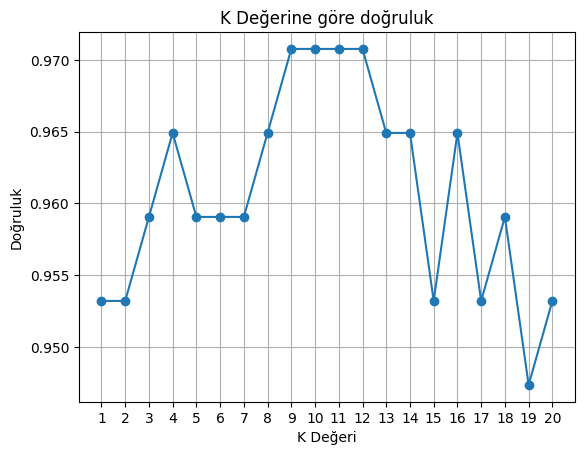

In [28]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(k_values, accuracy_values, marker="o",linestyle="-")
plt.title("K Değerine göre doğruluk")
plt.xlabel("K Değeri")
plt.ylabel("Doğruluk")
plt.xticks(k_values)
plt.grid(True)